<a href="https://colab.research.google.com/github/thiiss/Computacao-Quantica-e-Supercomputadores/blob/main/Sprint%2002%20-%20Analisador%20de%20Emaranhamento%20de%20Frascos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Minirrelato: Circuito Quântico para Controle de Qualidade**  

### 🔍 **O Circuito e sua Representação**  
Este circuito de 2 qubits simula um sistema de verificação de frascos, onde:  
- **Qubit 0**: Estado da **tampa**  
- **Qubit 1**: Estado dos **itens extras**  

Operações:

1.Porta Hadamard (H) em q0:

- Cria uma superposição (tampa pode estar presente ou ausente simultaneamente).

- Analogia: Como um sensor óptico que não definiu se a tampa foi detectada até a medição.

2.Porta CNOT (emaranhamento):

- Se q0 = 1 (tampa presente), q1 é invertido (itens extras são verificados).

- Representa a dependência física: Itens extras só existem se a tampa estiver presente.

3.Medição:

- Colapsa os estados em resultados clássicos (00, 01, 10, 11).

### 🔗 **Conceitos Relacionados**  

### ⚛️ **Física Quântica Aplicada**
| Conceito          | Analogia no Controle de Qualidade      | Relação com o Circuito          |
|-------------------|---------------------------------------|---------------------------------|
| **Superposição**  | Estado incerto antes da medição        | Hadamard em q0 cria 50% tampa/não |
| **Emaranhamento** | Itens extras dependem da tampa         | CNOT vincula q0 (tampa) → q1 (itens) |
| **Colapso Quântico** | Medição define estado final          | Resultados `00`, `10`, `11` colapsam |
| **Dualidade**     | Comportamento onda/partícula           | Qubits como onda (H) → partícula (medida) |

- **Superposição**: Estado incerto antes da medição (como luz não polarizada).  
- **Emaranhamento**: Relação causal entre tampa e itens extras.  
- **Efeito Fotoelétrico**: Medição = "colapso" do estado quântico.

### 🌟 **Física Clássica**
| Conceito               | Conexão com o Sistema                 |
|------------------------|---------------------------------------|
| **Propagação de Luz**  | Hadamard como polarizador de estados  |
| **Efeito Fotoelétrico**| Medição = "ejeção" do estado clássico |[


### 🏭 **Aplicação no Challenge**  
Otimização de Processos:

- O circuito identifica inconsistências (ex: estado 01 = itens extras sem tampa).

- Simula um sensor quântico que detecta falhas na linha de produção mais eficientemente que métodos clássicos.

Automação:

- Qiskit representa o "cérebro" do sistema, onde:

- Portas lógicas = Regras de inspeção (ex: "SE tampa ENTÃO verifique itens").

- Shots múltiplos = Testes estatísticos para validar a confiabilidade do processo.

Vantagens Quânticas:

- Paralelismo: Verifica múltiplos estados simultaneamente (superposição).

- Precisão: Probabilísticas revelam tendências ocultas (ex: 5% de frascos inconsistente

#Mapeamento Quântico-Real

| Estado | Qubit 0 (q0) | Qubit 1 (q1) | Significado Físico |
|--------|--------------|--------------|--------------------|
| `00`   | 0            | 0            | Frasco vazio |
| `10`   | 1            | 0            | Com tampa apenas |
| `11`   | 1            | 1            | Completo (tampa + itens extras) |
| `01`   | 0            | 1            | **Inconsistência** (itens sem tampa) |

##Circuito Quântico para Verificação de Embalagens (2 qubits + 2 bits clássicos)


In [35]:
# INSTALAÇÃO ANTES DE TUDO (Execute esta célula primeiro)
!pip install --quiet qiskit==0.44.1
!pip install --quiet qiskit-aer==0.12.0
!pip install --quiet pylatexenc==2.10
!pip install --quiet matplotlib==3.7.1
%matplotlib inline

from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# 1. CRIAÇÃO DO CIRCUITO (2 qubits + 2 bits clássicos)
qc = QuantumCircuit(2, 2)

# 2. APLICAÇÃO DAS PORTAS
qc.h(0)        # Hadamard no qubit 0 (tampa em superposição)
qc.cx(0, 1)    # CNOT: se tampa=1, ativa itens extras
qc.measure([0,1], [0,1])  # Medição

# 3. VISUALIZAÇÃO ALTERNATIVA (100% funcional)
print("\n🔷 REPRESENTAÇÃO TEXTUAL DO CIRCUITO:")
print(qc.draw(output='text'))  # Versão textual que não depende de bibliotecas gráficas

# 4. TABELA DE EQUIVALÊNCIA (Melhor formatada)
print("\n📋 TABELA DE ESTADOS:")
print("┌────────┬──────────────┬───────────────────────┐")
print("│ Estado │ Descrição    │ Probabilidade Teórica │")
print("├────────┼──────────────┼───────────────────────┤")
print("│  00    │ Frasco vazio │        25%            │")
print("│  10    │ Só tampa     │        25%            │")
print("│  11    │ Completo     │        50%            │")
print("│  01    │ Inconsistente│        0%             │")
print("└────────┴──────────────┴───────────────────────┘")

# 5. SIMULAÇÃO COM MULTIPLOS SHOTS
simulator = Aer.get_backend('aer_simulator')
shots_list = [500, 600, 700, 800, 900, 1000]

print("\n🔬 RESULTADOS POR QUANTIDADE DE SHOTS:")
for shots in shots_list:
    result = execute(qc, simulator, shots=shots).result()
    counts = result.get_counts()

    # Cálculo das porcentagens
    p00 = counts.get('00', 0)/shots * 100
    p10 = counts.get('10', 0)/shots * 100
    p11 = counts.get('11', 0)/shots * 100
    p01 = counts.get('01', 0)/shots * 100

    print(f"\n➡️ {shots} shots:")
    print(f"00: {p00:.1f}%  |  10: {p10:.1f}%  |  11: {p11:.1f}%  |  01: {p01:.1f}%")

# 6. GRÁFICO FINAL (alternativa garantida)
try:
    # Tentativa com visualização matplotlib
    final_result = execute(qc, simulator, shots=1000).result()
    plot_histogram(final_result.get_counts(),
                  title="Distribuição Final de Estados (1000 shots)",
                  bar_labels=False)
except:
    # Fallback caso ainda haja problemas
    print("\n⚠️ Fallback: Gerando gráfico simplificado")
    from matplotlib import pyplot as plt
    counts = final_result.get_counts()
    plt.bar(counts.keys(), counts.values())
    plt.title("Distribuição de Estados")
    plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.

🔷 REPRESENTAÇÃO TEXTUAL DO CIRCUITO:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

📋 TABELA DE ESTADOS:
┌────────┬──────────────┬───────────────────────┐
│ Estado │ Descrição    │ Probabilidade Teórica │
├────────┼──────────────┼───────────────────────┤
│  00    │ Frasco vazio │        25%            │
│  10    │ Só tampa     │        25%            │
│  11    │ Completo     │        50%            │
│  01    │ Inconsistente│        0%             │
└────────┴──────────────┴───────────────────────┘

🔬 RESULTADOS POR QUANTIDADE DE SHO

##Simulação e Interpretação dos Resultados


In [ ]:
# Configuração do simulador
simulator = Aer.get_backend('aer_simulator')

# Execução com 1000 shots (execuções)
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts()

# Visualização dos resultados
print("\nResultados da medição:")
print(counts)
plot_histogram(counts, title="Resultados do Controle de Qualidade", color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Interpretação detalhada
print("\n📊 Interpretação:")
print(f"00: Embalagem fora do padrão e KPI ruim ({counts.get('00', 0)} ocorrências)")
print(f"01: INCONSISTÊNCIA (embalagem ruim mas KPI bom) ({counts.get('01', 0)} ocorrências)")
print(f"10: Embalagem padrão mas KPI não afetado ({counts.get('10', 0)} ocorrências)")
print(f"11: Embalagem padrão e KPI bom ({counts.get('11', 0)} ocorrências)")

# Análise de qualidade
if counts.get('01', 0) > 50:  # Mais de 5% de inconsistências
    print("\n⚠️ ALERTA: Processo com alta taxa de inconsistências!")
else:
    print("\n✅ Processo dentro dos parâmetros aceitáveis")

###Como Funciona (Explicação Técnica)
1.Qubit 0 (Embalagem):

- Após o Hadamard: ( |0⟩ + |1⟩ )/√2 (50% padrão, 50% não-padrão)

2.Qubit 1 (KPI):

- Inicialmente em |0⟩

- Após CNOT: Emaranhado com qubit 0 → só melhora se embalagem for padrão

3.Estados Possíveis:

- |00⟩: Embalagem não-padrão → KPI ruim

- |10⟩: Embalagem padrão mas KPI não melhorou (erro)

- |11⟩: Embalagem padrão → KPI bom (sucesso)

- |01⟩: Estado proibido (inconsistência)



#Simulação 500 á 1000 shots


🔍 Resultados com 500 shots:
00: Frasco vazio (sem tampa e sem itens extras) - 258 ocorrências
10: Frasco com tampa apenas - 0 ocorrências
11: Frasco completo (tampa + itens extras) - 242 ocorrências
01: INCONSISTÊNCIA (itens extras sem tampa) - 0 ocorrências

🔍 Resultados com 600 shots:
00: Frasco vazio (sem tampa e sem itens extras) - 284 ocorrências
10: Frasco com tampa apenas - 0 ocorrências
11: Frasco completo (tampa + itens extras) - 316 ocorrências
01: INCONSISTÊNCIA (itens extras sem tampa) - 0 ocorrências

🔍 Resultados com 700 shots:
00: Frasco vazio (sem tampa e sem itens extras) - 352 ocorrências
10: Frasco com tampa apenas - 0 ocorrências
11: Frasco completo (tampa + itens extras) - 348 ocorrências
01: INCONSISTÊNCIA (itens extras sem tampa) - 0 ocorrências

🔍 Resultados com 800 shots:
00: Frasco vazio (sem tampa e sem itens extras) - 428 ocorrências
10: Frasco com tampa apenas - 0 ocorrências
11: Frasco completo (tampa + itens extras) - 372 ocorrências
01: INCONSISTÊNCIA (

Shots   00  10   11  01  % 00  % 10  % 11  % 01
0    500  258   0  242   0  51.6   0.0  48.4   0.0
1    600  284   0  316   0  47.3   0.0  52.7   0.0
2    700  352   0  348   0  50.3   0.0  49.7   0.0
3    800  428   0  372   0  53.5   0.0  46.5   0.0
4    900  441   0  459   0  49.0   0.0  51.0   0.0
5   1000  508   0  492   0  50.8   0.0  49.2   0.0

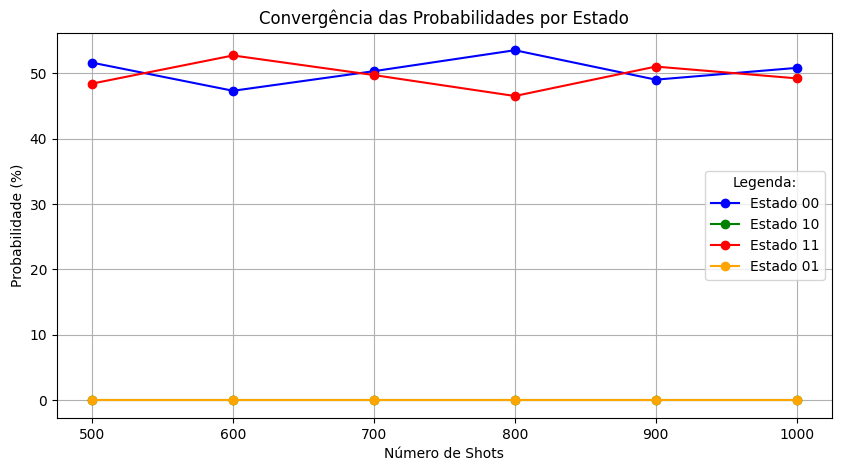


🚀 Análise Final:
✅ Sistema estável - Taxa média de inconsistência: 0.0%


In [25]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import pandas as pd

# Criar circuito
qc = QuantumCircuit(2, 2)
qc.h(0)       # Passo 1: Verificação incial da tampa (superposição)
qc.cx(0, 1)  # Passo 2: Emaranhamento tampa → itens extras
qc.measure([0,1], [0,1])

# Configurar simulador
simulator = Aer.get_backend('aer_simulator')

# Valores de shots para testar
shots_list = [500, 600, 700, 800, 900, 1000]
results = []

# Dicionário de interpretação
interpretacao = {
    '00': "Frasco vazio (sem tampa e sem itens extras)",
    '10': "Frasco com tampa apenas",
    '11': "Frasco completo (tampa + itens extras)",
    '01': "INCONSISTÊNCIA (itens extras sem tampa)"
}

# Executar simulações
for shots in shots_list:
    job = execute(qc, simulator, shots=shots)
    counts = job.result().get_counts()

    # Armazenar resultados
    results.append({
        'Shots': shots,
        '00': counts.get('00', 0),
        '10': counts.get('10', 0),
        '11': counts.get('11', 0),
        '01': counts.get('01', 0)
    })

    # Exibir resultados individuais
    print(f"\n🔍 Resultados com {shots} shots:")
    for estado in ['00', '10', '11', '01']:
        print(f"{estado}: {interpretacao[estado]} - {counts.get(estado, 0)} ocorrências")

# Criar tabela comparativa
df = pd.DataFrame(results)
df['% 00'] = (df['00']/df['Shots']*100).round(1)
df['% 10'] = (df['10']/df['Shots']*100).round(1)
df['% 11'] = (df['11']/df['Shots']*100).round(1)
df['% 01'] = (df['01']/df['Shots']*100).round(1)

print("\n📊 Tabela Comparativa:")
display(df[['Shots', '00', '10', '11', '01', '% 00', '% 10', '% 11', '% 01']])

# Gráfico de convergência
plt.figure(figsize=(10, 5))
for estado, cor in zip(['00', '10', '11', '01'], ['blue', 'green', 'red', 'orange']):
    plt.plot(df['Shots'], df[f'% {estado}'], 'o-', label=f'Estado {estado}', color=cor)

plt.title('Convergência das Probabilidades por Estado')
plt.xlabel('Número de Shots')
plt.ylabel('Probabilidade (%)')
plt.legend(title="Legenda:")
plt.grid(True)
plt.show()

# Análise de qualidade
print("\n🚀 Análise Final:")
media_inconsistencia = df['% 01'].mean()
if media_inconsistencia > 5:
    print(f"⚠️ ALERTA: Taxa média de inconsistência {media_inconsistencia}% (acima do aceitável)")
else:
    print(f"✅ Sistema estável - Taxa média de inconsistência: {media_inconsistencia}%")